<a href="https://colab.research.google.com/github/Minorito/CursoPandas/blob/main/Criando_Agrupamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório de Análise VII

## Criando Agrupamentos

In [79]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

In [80]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [81]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [82]:
dados['Valor'].mean()

5159.318636548821

In [83]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [84]:
dados['Bairro'].drop_duplicates

<bound method Series.drop_duplicates of 0             Copacabana
5        Barra da Tijuca
9             Copacabana
10            Copacabana
11            Copacabana
              ...       
22081             Leblon
22082            Ipanema
22083             Tijuca
22085    Barra da Tijuca
22090             Leblon
Name: Bairro, Length: 12328, dtype: object>

In [85]:
grupo_bairro = dados.groupby('Bairro')

In [86]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [87]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 65, 69, 75, 80, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 500, 506, 509, 517, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 592, 595, 596, 598, 602, 604, 609, 619, 631, 639, ...], 'Botafogo': [23, 48, 58, 88, 89, 112, 120, 128, 135, 138, 199, 203, 228, 327, 338, 366, 419, 420, 504, 530, 532, 551, 601, 659, 695, 729, 766, 776, 784, 835, 840, 874, 931, 940, 944, 1023, 1060, 1098, 1109, 1128, 1134, 1145, 1158, 1183, 1220, 1224, 1242, 1269, 1301, 1314, 1324, 1337, 1368, 1404, 1423, 1436, 1441, 1457, 1478, 1521, 1542, 1554, 1604, 1655, 1680, 1695, 1724, 1766, 1767, 1814, 1840, 1849, 1852, 1879, 1948, 1957, 1984, 1999, 2008, 2016, 2056, 2093, 2096, 2108, 2110, 2111, 2

In [88]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [89]:
for bairro, dados in grupo_bairro:
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [90]:
for bairro, data in grupo_bairro: 
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7089.933523021211
Botafogo -> 9328.872881355932
Copacabana -> 4137.687429218573
Flamengo -> 4146.934265734266
Ipanema -> 9525.7616638561
Leblon -> 8791.985714285714
Tijuca -> 2133.7865470852016


In [91]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7089.93,3588.23
Botafogo,9328.87,905.31
Copacabana,4137.69,1147.00
Flamengo,4146.93,1100.61
Ipanema,9525.76,2230.64
Leblon,8791.99,2104.63
Tijuca,2133.79,702.12


In [92]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3866.0,7089.93,11914.52,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,944.0,9328.87,146382.98,700.0,2300.0,3200.0,4650.0,4500000.0
Copacabana,2649.0,4137.69,3627.79,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,715.0,4146.93,3939.06,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1779.0,9525.76,8706.01,1200.0,4500.0,7000.0,11500.0,100000.0
Leblon,1260.0,8791.99,7092.24,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1115.0,2133.79,1896.81,750.0,1500.0,1800.0,2300.0,45000.0


In [93]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27409683.0
Botafogo,700.0,4500000.0,8806456.0
Copacabana,100.0,35000.0,10960734.0
Flamengo,800.0,35000.0,2965058.0
Ipanema,1200.0,100000.0,16946330.0
Leblon,100.0,100000.0,11077902.0
Tijuca,750.0,45000.0,2379172.0


In [94]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,100000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

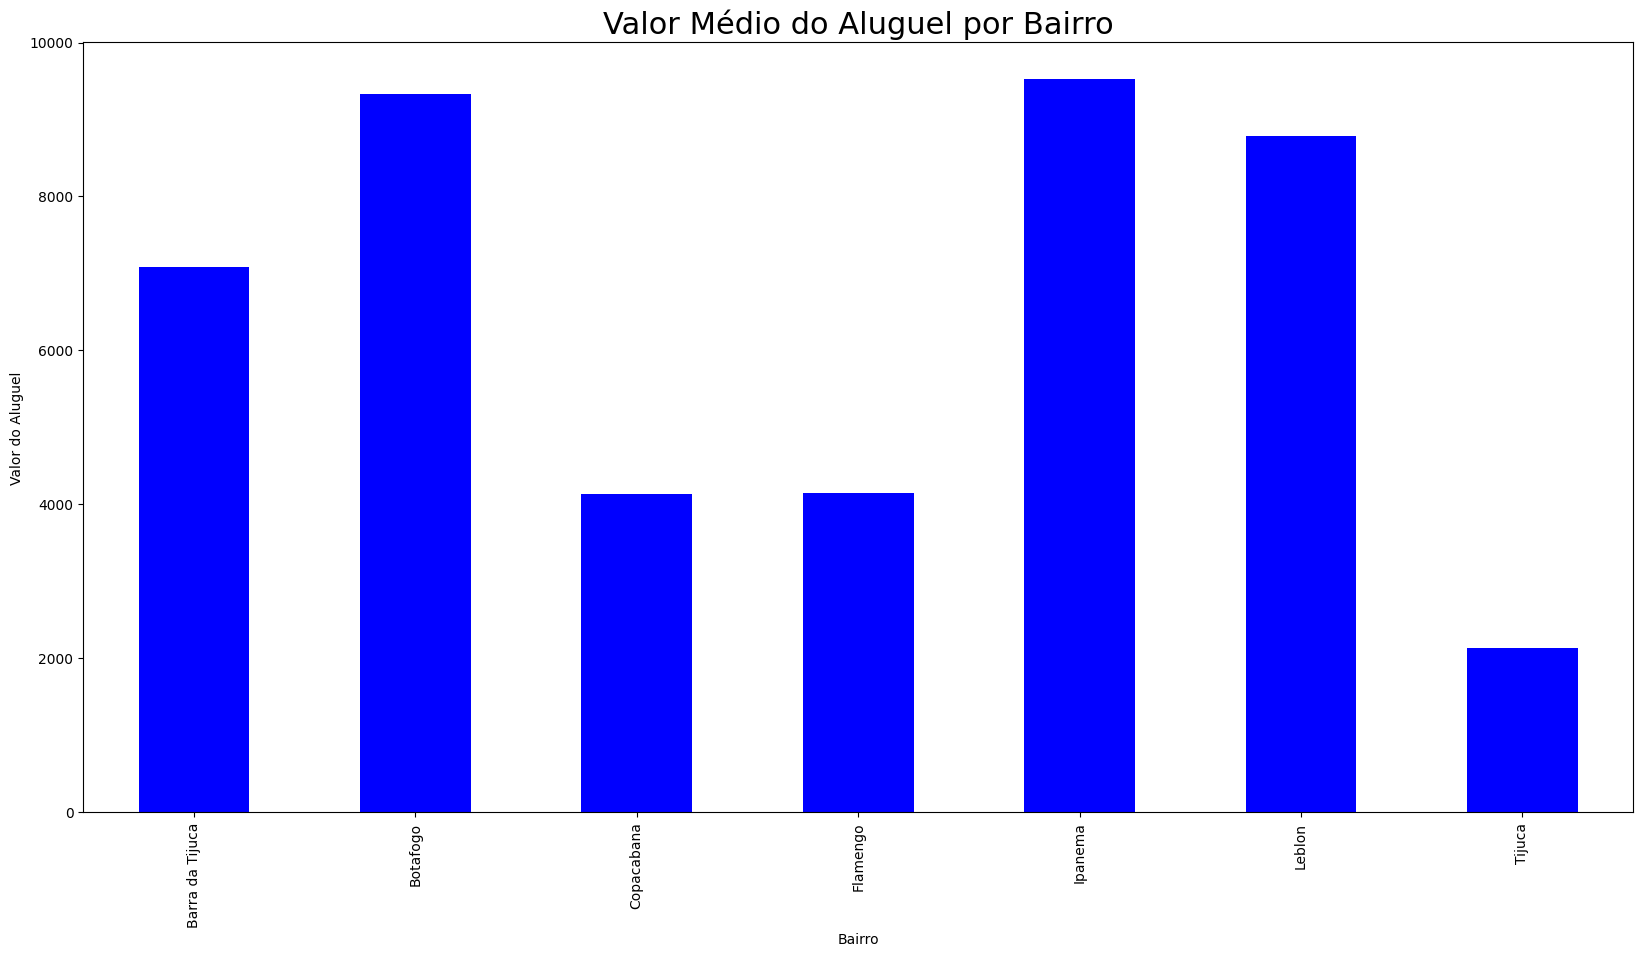

In [100]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize' : 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

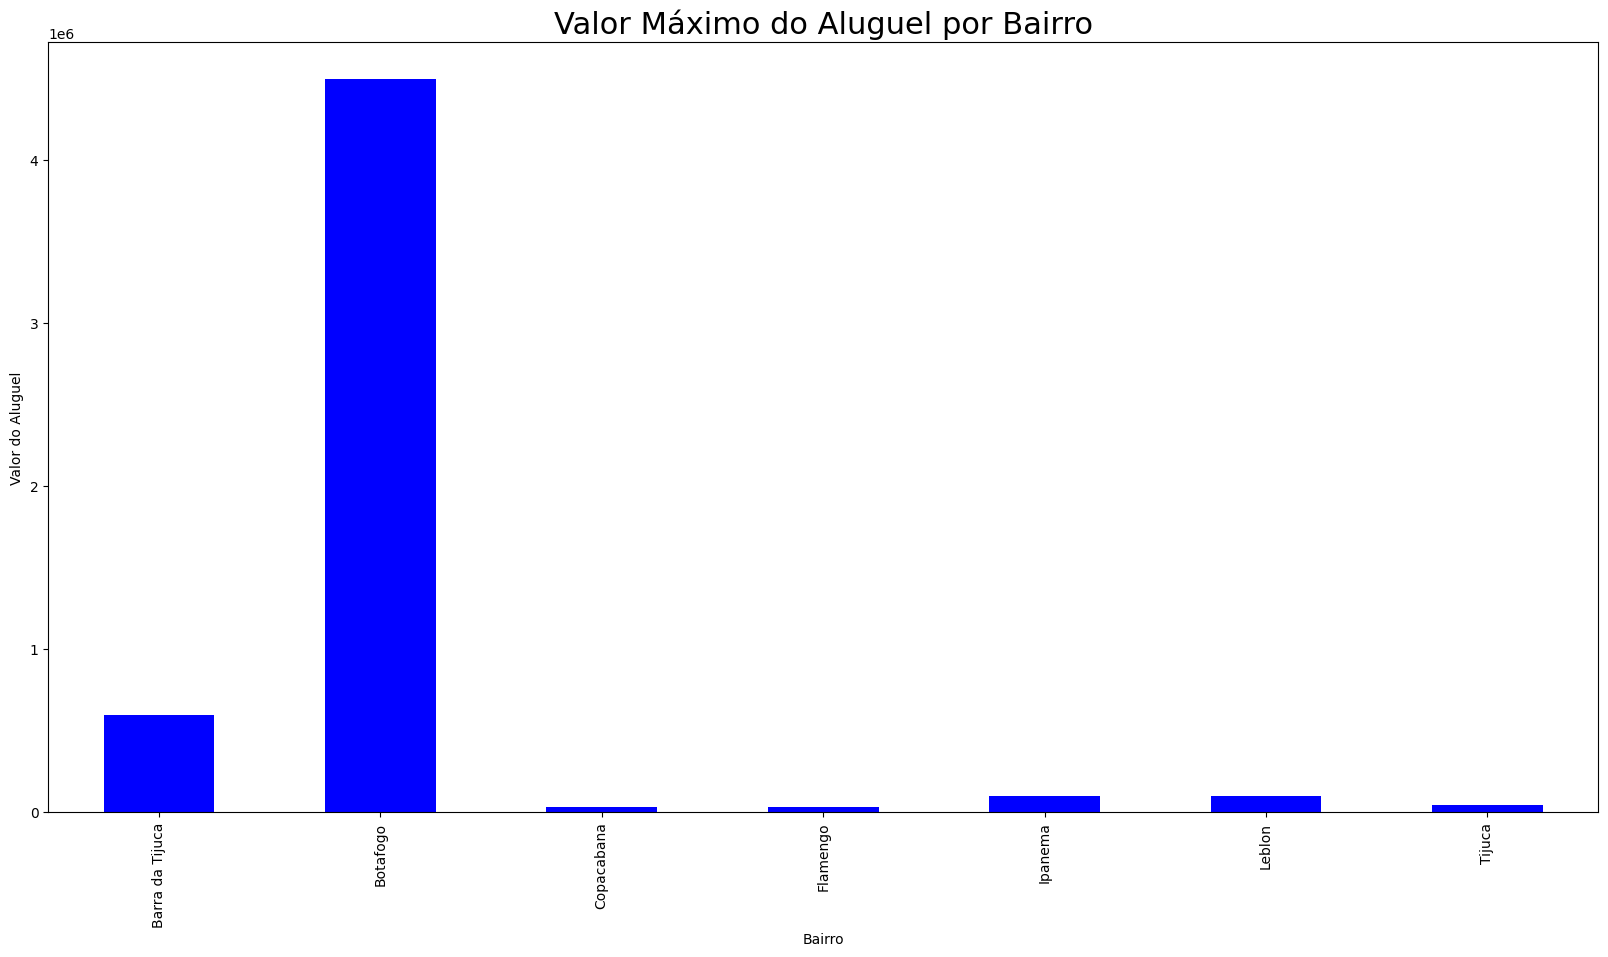

In [101]:
fig = grupo_bairro['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize' : 22})

Text(0.5, 1.0, 'Valor Mínimo do Aluguel por Bairro')

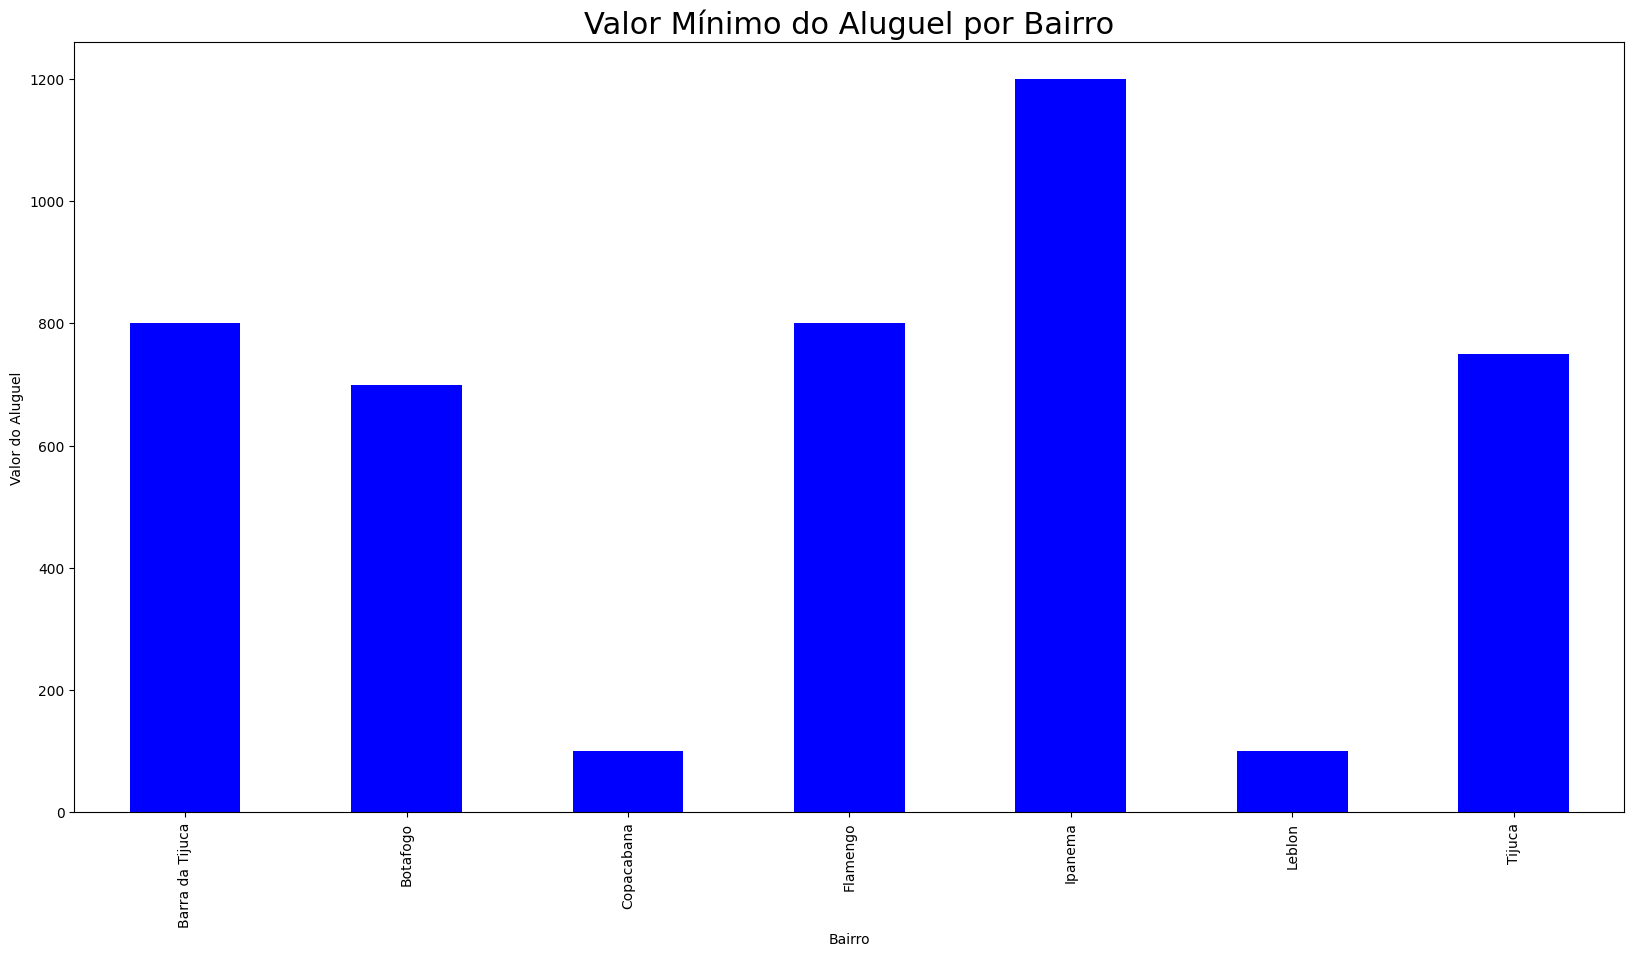

In [105]:
fig = grupo_bairro['Valor'].min().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Mínimo do Aluguel por Bairro', {'fontsize' : 22})

* Atividade 1

In [103]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [104]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


* Atividade 2

In [109]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [111]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [112]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão','min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2
